In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()
sys.path.append(BASE_PATH)

from text_classification.fast_text.train import trainIters

In [2]:
BOTBOT_TEST_PATH = path.join(BASE_PATH, 'data/botbot/francis.json')

In [3]:
import json
BOTBOT_DATA = json.load(open(BOTBOT_TEST_PATH, 'r'))
print('Loaded %s intents' % len(BOTBOT_DATA))

Loaded 323 intents


In [4]:
IGNORE_CONTEXT = True # flag for ignoring intents with contexts

classes = list(set([
    intent['name'] 
    for intent in BOTBOT_DATA 
    if (not IGNORE_CONTEXT or len(intent['inContexts']) == 0)
]))

training_data = []

for intent in BOTBOT_DATA:
    examples = intent['examples']
    if intent['name'] in classes:
        cls = classes.index(intent['name'])
        if len(examples) > 0:
            for example in examples:
                text = ''.join([entity['text'] for entity in example['entities']])
                training_data.append((text, cls))

print('Loaded %s examples' % len(training_data))

Loaded 5215 examples


Training started
Importing /Users/2359media/Documents/botbot-nlp/data/glove/glove.840B.300d.txt...
0m 43s (- 6m 32s) (5 10%) 0.0734 - accuracy: 0.1195
1m 22s (- 5m 29s) (10 20%) 0.0367 - accuracy: 0.4875
1m 56s (- 4m 32s) (15 30%) 0.0176 - accuracy: 0.7180
2m 31s (- 3m 46s) (20 40%) 0.0058 - accuracy: 0.8905
3m 4s (- 3m 4s) (25 50%) 0.0028 - accuracy: 0.9466
3m 52s (- 2m 34s) (30 60%) 0.0016 - accuracy: 0.9671
4m 28s (- 1m 54s) (35 70%) 0.0013 - accuracy: 0.9750
5m 5s (- 1m 16s) (40 80%) 0.0023 - accuracy: 0.9720
5m 37s (- 0m 37s) (45 90%) 0.0023 - accuracy: 0.9677
6m 10s (- 0m 0s) (50 100%) 0.0022 - accuracy: 0.9722


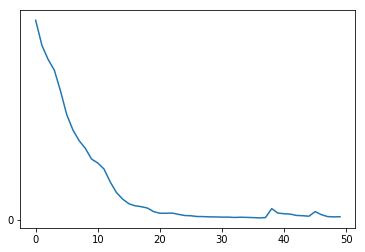

In [5]:
losses, model = trainIters(training_data, 
                           classes, 
                           n_iters=50, 
                           log_every=5, 
                           verbose=1,
                           learning_rate=1e-3, 
                           batch_size=64)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
fig, ax = plt.subplots()
loc = ticker.MultipleLocator(base=5)
ax.yaxis.set_major_locator(loc)
plt.plot(losses)

In [6]:
from text_classification.fast_text.train import evaluate_all
print('Model recall: %s' % evaluate_all(model, training_data))

Model recall: 0.8713326941514861


In [7]:
from common.utils import argmax
from text_classification.fast_text.model import process_sentences

print('Model errors:')
for sentence, gt_class in training_data: 
    precheck_sent = process_sentences([sentence])
    pred_class = argmax(model(*precheck_sent))
    if gt_class != pred_class:
        print('Sentence: %s' % sentence)
        print('Ground truth: %s, Predicted: %s\r\n' % (classes[gt_class], classes[pred_class]))

Model errors:
Sentence: fibre entertainment bundle
Ground truth: CIS - FibreEntertainment Bundle, Predicted: CIS-Mobile-Product-FibreBroadbandPlans

Sentence: what is FEB+
Ground truth: CIS - FibreEntertainment Bundle, Predicted: CIS-Mobile-Product-FibreBroadbandPlans

Sentence: what is feb
Ground truth: CIS - FibreEntertainment Bundle, Predicted: CIS-Others-FEB

Sentence: are you able to check on my eligibility for one of my handphone line
Ground truth: CIS-1688, Predicted: CIS-MobilePlan-ContractStatus

Sentence: how can i opt out of my caller ID
Ground truth: CIS-1688, Predicted: CIS-Online-DeliveryOptions

Sentence: i lost my phone
Ground truth: CIS-1688, Predicted: CIS-Mobile-AddOn-ZoneAlarm

Sentence: what phone number to send my complaints
Ground truth: CIS-1688, Predicted: CIS-Mobile-AddOn-CallerNumberNonDisplay

Sentence: is there any phone number i can call to express my complaints
Ground truth: CIS-1688, Predicted: CIS-HotlineNumber-Service

Sentence: where should i call if 

Sentence: when can i purchase the samsung note 8
Ground truth: CIS-Devices-Note8, Predicted: CIS-Devices-LatestIphone

Sentence: i want to buy the samsung note 8
Ground truth: CIS-Devices-Note8, Predicted: CIS-Devices-LatestIphone

Sentence: when can i purchase the note 8
Ground truth: CIS-Devices-Note8, Predicted: CIS-Devices-LatestIphone

Sentence: can i purchase the note 8
Ground truth: CIS-Devices-Note8, Predicted: CIS-Devices-LatestIphone

Sentence: how much is the xiaomi
Ground truth: CIS-Devices, Predicted: CIS-MobilePlan-Discount

Sentence: how much is the ino price
Ground truth: CIS-Devices, Predicted: CIS-MobilePlan-Discount

Sentence: i want a free phone
Ground truth: CIS-Devices, Predicted: CIS-MobilePlan-NoMobilePhone

Sentence: i need a free phone
Ground truth: CIS-Devices, Predicted: CIS-MobilePlan-NoMobilePhone

Sentence: what is the best phone now
Ground truth: CIS-Devices, Predicted: CIS-Mobile-AddOn-ZoneAlarm

Sentence: what is the cheapest phone
Ground truth: CIS-De

Sentence: i want to call $countries
Ground truth: CIS-Mobile-Product-IDDCalls, Predicted: CIS-HotlineNumber-Service

Sentence: cheap international phone calls
Ground truth: CIS-Mobile-Product-IDDCalls, Predicted: CIS-Mobile-AddOn-V019

Sentence: how can i make international phone calls
Ground truth: CIS-Mobile-Product-IDDCalls, Predicted: CIS-Mobile-AddOn-V019

Sentence: i want info on readyroam
Ground truth: CIS-Mobile-Product-ReadyRoam, Predicted: CIS-Mobile-AddOn-Roaming

Sentence: What are the charges for e
Ground truth: CIS-Mobile-Product-ReadyRoam, Predicted: CIS-MobilePlan-RecontractAdminCharges

Sentence: ready to go roaming
Ground truth: CIS-Mobile-Product-ReadyRoam, Predicted: CIS-Mobile-AddOn-Roaming

Sentence: i want to sign up for ready roam
Ground truth: CIS-Mobile-Product-ReadyRoam, Predicted: CIS-Mobile-AddOn-Roaming

Sentence: overseas roaming for 30 days
Ground truth: CIS-Mobile-Product-ReadyRoam, Predicted: CIS-Mobile-AddOn-Roaming

Sentence: what exactly is ready ro

Sentence: mobile plan for ernst & young
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Mobile-AddOn-V019

Sentence: What is the corporate discount for 3m technologies?
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Others-Broadband

Sentence: are there any handset discounts
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Others-Broadband

Sentence: how much is combo 2 for HSBC
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Mobile-AddOn-CAST-VarietyPlus

Sentence: what are the discounts like for CIS
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-About-MenuWhatIsBenefits

Sentence: is there any cost reduction for subscription
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Online-DeliveryOptions

Sentence: what do i get in return for subscribing
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-Promo-Menu

Sentence: how much cost does CIS reduce each month
Ground truth: CIS-MobilePlan-Discount, Predicted: CIS-About-MenuWhatIsBenefits

Sentence:

Sentence: please cancel my cis line
Ground truth: CIS-MobilePlan-TerminateEarly, Predicted: CIS-HotlineNumber-Service

Sentence: cancel my line
Ground truth: CIS-MobilePlan-TerminateEarly, Predicted: CIS-MobilePlan-Cancellation

Sentence: can i transfer line
Ground truth: CIS-MobilePlan-TransferOwnership, Predicted: CIS-MobilePlan-Convert#CMESToCIS

Sentence: i want to transfer line to mom
Ground truth: CIS-MobilePlan-TransferOwnership, Predicted: CIS-MobilePlan-Convert#CMESToCIS

Sentence: i want to change ownership
Ground truth: CIS-MobilePlan-TransferOwnership, Predicted: CIS-MobilePlan-Convert#CMESToCIS

Sentence: is the free caller ID only for online purcase
Ground truth: CIS-Online-CallerID-Free, Predicted: CIS-Promo-OnlineBenefits

Sentence: i'm on my combo 2 plan and would like to know the delivery fee
Ground truth: CIS-Online-DeliveryCharges, Predicted: CIS-Mobile-Product-EnterpriseMobileBundle

Sentence: waive delivery charges
Ground truth: CIS-Online-DeliveryCharges, Predict

Sentence: i don't have a email address
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Online-TroubleshootOTP

Sentence: i do not have email address
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Others-Email

Sentence: i don't have an email
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Online-TroubleshootOTP

Sentence: i do not have a email address
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Mobile-AddOn-VoiceMail

Sentence: i cannot sign up for cis plan online;
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Promo-OnlineBenefits

Sentence: no company email to sign up
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-About-NotApplicable

Sentence: i couldn't get a connection with chat online for past 5 hours
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Online-Purchase-Problem

Sentence: what if the company is under CIS but i'm unable to login using online purchase
Ground truth: CIS-Online-Troubleshoot, Predicted: CIS-Online-Purchase-Pr

Sentence: what can customers get in return for using cis
Ground truth: CIS-Others-LoyalCustomer, Predicted: CIS-HotlineNumber-Service

Sentence: is there an upcoming flash sale
Ground truth: CIS-Others-Newsletter, Predicted: CIS-Promo-Next

Sentence: any other promotions roadshows
Ground truth: CIS-Others-Roadshow, Predicted: CIS-Promo-Menu

Sentence: any free early recontract
Ground truth: CIS-Promo-Latest, Predicted: CIS-Promo-Menu

Sentence: i want to know when is the next promotion
Ground truth: CIS-Promo-Next, Predicted: CIS-Others-Newsletter

Sentence: why still no news on CIS Flash Online Sales
Ground truth: CIS-Promo-Next, Predicted: CIS-Promo-OnlineBenefits

Sentence: i want to know the next flash sale
Ground truth: CIS-Promo-Next, Predicted: CIS-Others-Newsletter

Sentence: when is the next flash sale
Ground truth: CIS-Promo-Next, Predicted: CIS-Others-Newsletter

Sentence: are you a bot
Ground truth: SmallTalk-Availability, Predicted: smalltalk.agent.chatbot

Sentence: do yo

Sentence: that's wonderful
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.appraisal.bad

Sentence: this is good
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.appraisal.bad

Sentence: this is great
Ground truth: smalltalk.appraisal.good, Predicted: CIS-Mobile-AddOn-CAST-VarietyPlus

Sentence: very then
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.appraisal.bad

Sentence: I'm glad to hear that
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.user.excited

Sentence: ok good
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.appraisal.bad

Sentence: good for you
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.greetings.goodnight

Sentence: glad to hear it
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.greetings.nice_to_see_you

Sentence: so good
Ground truth: smalltalk.appraisal.good, Predicted: smalltalk.appraisal.bad

Sentence: it was good
Ground truth: smalltalk.appraisal.good, Predicted: small

In [8]:
BOTBOT_CHATLOG_PATH = path.join(BASE_PATH, 'data/botbot/francis_ChatLogExport.csv')

In [9]:
import csv
CHATLOG_DATA = []
with open(BOTBOT_CHATLOG_PATH, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = 0
    keys = []
    for row in reader:
        if rows == 0:
            keys = row
        else:
            item = {}
            for idx, key_name in enumerate(keys):
                item[key_name] = row[idx]
            CHATLOG_DATA.append(item)
        rows += 1

In [10]:
CHATLOG_DATA[3]

{'Channel': 'directline',
 'From': '',
 'Intent': 'CIS-Greetings',
 'Score': '1',
 'Text Reply': 'Hi, I\'m FranCIS. How can I help you today with your CIS enquiries? You can say "menu" at any time to pull out the menu options again.',
 'User Message': 'User clicked on a button Hello'}

In [11]:
total = 0
correct = 0

for log_item in CHATLOG_DATA:
    user_msg = log_item.get('User Message', None)
    intent_txt = log_item.get('Intent', None)
    if user_msg and intent_txt:
        if not (len(user_msg) > 6 and user_msg[:5] == '|-|#|'): # skips
            if len(user_msg) > 25 and user_msg[:25] == 'User clicked on a button ':
                user_msg = user_msg[25:]
            if intent_txt != 'Default Fallback Intent' and intent_txt in classes \
                and user_msg.lower() not in ['hello', 'hi']:
                total += 1
                # Get DF class index
                intent_cls = classes.index(intent_txt)
                
                # Get own model class index
                precheck_sent = process_sentences([user_msg])
                pred_class = argmax(model(*precheck_sent))
                
                if intent_cls != pred_class:
                    print('Sentence: %s' % user_msg)
                    print('Dialogflow: %s, Predicted: %s\r\n' % (classes[intent_cls], classes[pred_class]))
                else:
                    correct += 1

print('Accuracy: %s - Correct predictions: %s out of %s' % (str(float(correct) / float(total)), correct, total))

Sentence: i want to port our
Dialogflow: CIS-MobilePlan-PortOut, Predicted: CIS-MobilePlan-Port-in

Sentence: I hate u
Dialogflow: SmallTalk-SingtelLousy, Predicted: smalltalk.user.misses_agent

Sentence: i hate you
Dialogflow: SmallTalk-SingtelLousy, Predicted: smalltalk.user.misses_agent

Sentence: i want to port of
Dialogflow: CIS-MobilePlan-PortOut, Predicted: CIS-MobilePlan-Port-in

Sentence: Okay. So, tell me a little bit about FranCIS
Dialogflow: CIS-Others-DepositForForeigners, Predicted: CIS-About-MenuWhatIsBenefits

Sentence: Why do you call yourself FranCIS?
Dialogflow: SmallTalk-Identity, Predicted: smalltalk.agent.acquaintance

Sentence: well, i have 199
Dialogflow: smalltalk.appraisal.good, Predicted: CIS-MobilePlan-Convert-1st

Sentence: criteria to enrol inc is
Dialogflow: CIS-About-EnrolCriteria, Predicted: CIS-MobilePlan-ConvertFees

Sentence: my baby got a cold
Dialogflow: CIS-About-MenuWhatIsBenefits, Predicted: smalltalk.user.bored

Sentence: my baby got a cold
Dia

Sentence: tell me a joke
Dialogflow: smalltalk.user.joking, Predicted: smalltalk.vulgarities

Sentence: who are you
Dialogflow: Smalltalk-Who, Predicted: smalltalk.agent.acquaintance

Sentence: you know Alexa
Dialogflow: smalltalk.agent.clever, Predicted: CIS-Menu

Sentence: can we carrying
Dialogflow: smalltalk.user.wants_to_talk, Predicted: CIS-About-CompanyEnrollment#Less200

Sentence: how do I sign up
Dialogflow: CIS-MobilePlan-SignUp, Predicted: CIS-Online-NumberRetention

Sentence: how much do I have to pay for the plains
Dialogflow: CIS-Mobile-Product-SingtelCircle, Predicted: CIS-MobilePlan-ConvertFees

Sentence: wife is late
Dialogflow: CIS-Online-DeliveryLate, Predicted: CIS-MobilePlan-RecontractEarly

Sentence: can you sure set was the question
Dialogflow: CIS-MobilePlan-RecontractAdminCharges|yes, Predicted: smalltalk.agent.beautiful

Sentence: yes hi
Dialogflow: CIS-MobilePlan-RecontractAdminCharges|yes, Predicted: smalltalk.appraisal.thank_you

Sentence: i signed up on 4 